In [1]:
# Importing the required libraries
import sys
import argparse
import numpy as np
import math
from utils import move
import random
import matplotlib.pyplot as plt
from QuadMDP.QuadTree import Point, Rect
from QuadMDP.QuadMDP import QuadMDP
from utils.Obstacle import Obstacle, Agent
from utils.Global import Global
from utils.agent_graph import *
from matplotlib.animation import FuncAnimation
from utils.RandomMap import RandomMap
import time
import csv

In [ ]:
import matplotlib.pyplot as plt

# Define the dimensions of the map
dimension = (50, 50)  # Width x Height

# Define the threshold and scale parameters
thresh = 0.55
scale = 10

# Create an instance of RandomMap
random_map = RandomMap(dimension, thresh, scale)

# Plot the map
fig, ax = plt.subplots()
random_map.plot(ax)
plt.show()




In [134]:
import numpy as np
import matplotlib.pyplot as plt

class MazeGenerator:
    def __init__(self, width, height, density):
        self.width = width
        self.height = height
        self.density = density
        self.grid = self.generate_random_maze()

    def generate_random_maze(self):
        maze = np.random.choice([0, 1], size=(self.height, self.width), p=[1-self.density, self.density])
        maze[0, 0] = 0  # Entrance
        maze[-1, -1] = 0  # Exit
        
        
   # Make the entrance and exit
        # Generate a random path from entrance to exit using random walk
        x, y = 0, 0
        while (x, y) != (self.width - 1, self.height - 1):
            directions = [(0, 1), (1, 0)]
            random.shuffle(directions)
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.width and 0 <= ny < self.height:
                    #maze[ny, nx] = 0
                    x, y = nx, ny
                    break        
        
        return maze

    def display(self, start_pos, goal_pos, path=None):
        plt.imshow(self.grid, cmap='binary')

        # Mark the entrance and exit positions
        plt.scatter(start_pos[1], start_pos[0], color='red', marker='o', s=50, label='Start')
        plt.scatter(goal_pos[1], goal_pos[0], color='green', marker='o', s=50, label='Goal')

        if path:
            # Plot the learned path
            path_x, path_y = zip(*path)
            plt.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')

        plt.legend()
        plt.show()


# Define the dimensions of the maze
width = 64
height = 64

# Define the density of walls in the maze (between 0 and 1)
density = 0.35




In [135]:
# Create a maze generator instance
maze_generator = MazeGenerator(width, height, density)

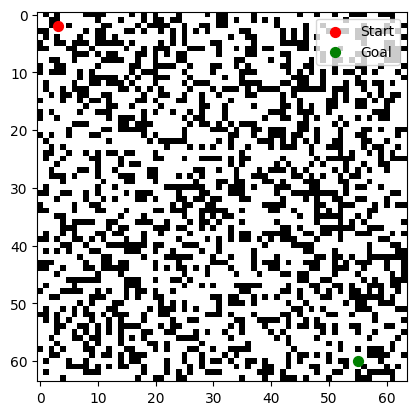

In [141]:


# Specify the starting and goal positions
startPos = (2,3)
goalPos = (60,55)

# Display the generated maze as a figure with starting and goal positions
maze_generator.display(startPos, goalPos)

episod = 0
steps = 16376
episod = 100
steps = 5191
episod = 200
steps = 1675
episod = 300
steps = 2886
episod = 400
steps = 2835
episod = 500
steps = 1321
episod = 600
steps = 636
episod = 700
steps = 1870
episod = 800
steps = 483
episod = 900
steps = 422
episod = 1000
steps = 665
episod = 1100
steps = 400
episod = 1200
steps = 1016
episod = 1300
steps = 377
episod = 1400
steps = 342
episod = 1500
steps = 3425
episod = 1600
steps = 263
episod = 1700
steps = 359
episod = 1800
steps = 241
episod = 1900
steps = 228
episod = 2000
steps = 430
episod = 2100
steps = 292
episod = 2200
steps = 186
episod = 2300
steps = 241
episod = 2400
steps = 253
episod = 2500
steps = 178
episod = 2600
steps = 187
episod = 2700
steps = 151
episod = 2800
steps = 175
episod = 2900
steps = 195
episod = 3000
steps = 172
episod = 3100
steps = 163
episod = 3200
steps = 145
episod = 3300
steps = 137
episod = 3400
steps = 140
episod = 3500
steps = 138
episod = 3600
steps = 140
episod = 3700
steps = 147
episod = 3800


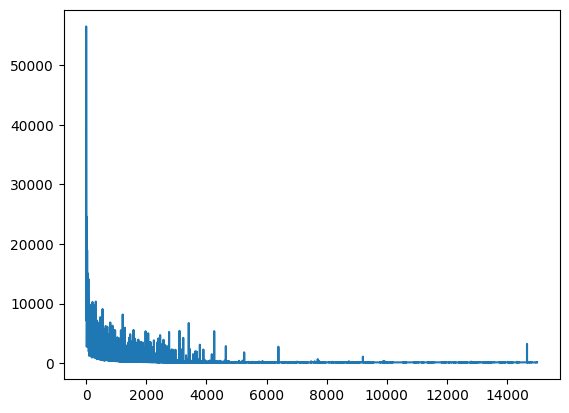

In [142]:
import numpy as np

class QLearningMazeSolver:
    def __init__(self, maze, startPos, goalPos, alpha=0.1, gamma=1, epsilon=0.1, epochs=15000):
        self.maze = maze
        self.startPos = startPos
        self.goalPos = goalPos
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epochs = epochs  # Number of episodes
        self.height, self.width = maze.shape  # Get maze dimensions
        self.q_table = np.zeros((self.height, self.width, 4))  # Q-table: 4 possible actions (up, down, left, right)

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)  # Random action (exploration)
        else:
            q_values = self.q_table[state[0], state[1]]
            max_q_value = np.max(q_values)
            # Find indices of actions with maximum Q-value
            greedy_actions = [i for i, q_value in enumerate(q_values) if q_value == max_q_value]
            # If there are multiple greedy actions, randomly select one
            action = np.random.choice(greedy_actions)
            return action

    def update_q_table(self, state, action, reward, next_state):
        self.q_table[state[0], state[1], action] += self.alpha * (reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]]) - self.q_table[state[0], state[1], action])

    def solve_maze(self):
        episode_steps = []
        for ep in range(self.epochs):
            state = self.startPos
            steps = 0  # Variable to store steps in current episode
            while state != self.goalPos:
                action = self.choose_action(state)
                next_state, reward = self.take_action(state, action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                steps = steps + 1
            if ep % 100 == 0:
                print('episod = {}'.format(ep))
                print('steps = {}'.format(steps))
            episode_steps.append(steps)  # Save total steps for the current episode
            if ep > 100:
                if np.abs(steps - np.mean(episode_steps[-10:])) < -1:
                    break
                
        return episode_steps

    def take_action(self, state, action):
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Possible actions: up, down, left, right
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
        
        # Ensure next state is within grid boundaries
        next_state = (max(0, min(self.height - 1, next_state[0])),
                    max(0, min(self.width - 1, next_state[1])))        
        
        # If next position is a wall, keep the next state the same as the current state
        if self.maze[next_state[0], next_state[1]] == 1:
            next_state = state
        
        if next_state == self.goalPos:
            reward = 10  # Reward: 10 for reaching the goal
            done = True  # Episode terminates
        else:
            reward = -1  # Reward: -1 for every movement
            done = False  # Episode continues
        
        return next_state, reward


    def get_path(self):
        path = [self.startPos]
        state = self.startPos
        while state != self.goalPos:
            #action = np.argmax(self.q_table[state[0], state[1]])
            q_values = self.q_table[state[0], state[1]]
            max_q_value = np.max(q_values)
            # Find indices of actions with maximum Q-value
            greedy_actions = [i for i, q_value in enumerate(q_values) if q_value == max_q_value]
            # If there are multiple greedy actions, randomly select one
            action = np.random.choice(greedy_actions)
            next_state, _ = self.take_action(state, action)
            path.append(next_state)
            state = next_state
        return path

# Example usage:
solver = QLearningMazeSolver(maze_generator.grid, startPos, goalPos)
episode_steps = solver.solve_maze()


In [59]:
ep = 1
print('episod = {}'.format(ep))

episod = 1


Text(0, 0.5, 'steps')

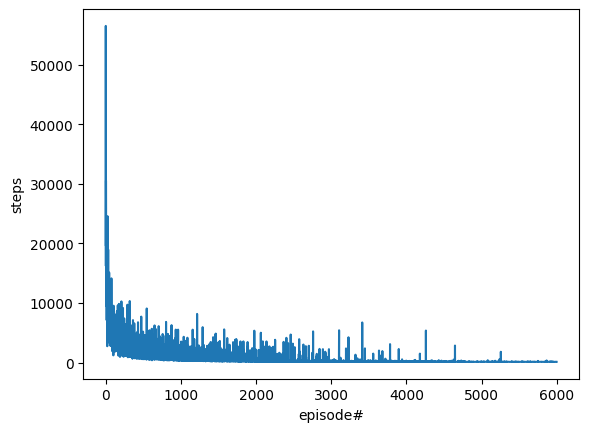

In [159]:
plt.plot(episode_steps[0:6000])
plt.xlabel('episode#')
plt.ylabel('steps')

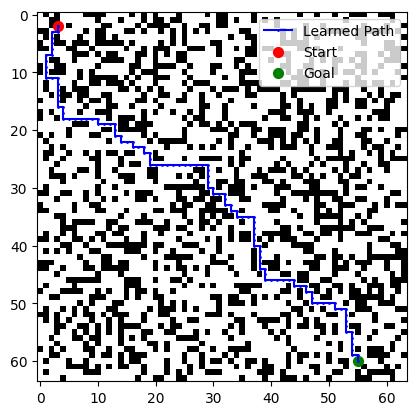

In [157]:
path = solver.get_path()
# Display the maze with the learned path
maze_generator.display(startPos, goalPos, path)